In [1]:
import numpy as np
import sklearn.datasets
import mglearn
import matplotlib.pyplot as plt
import pandas as pd

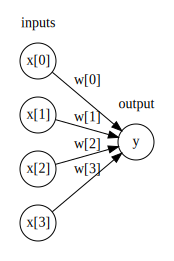

In [2]:
display(mglearn.plots.plot_logistic_regression_graph())

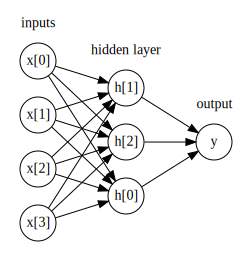

In [3]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

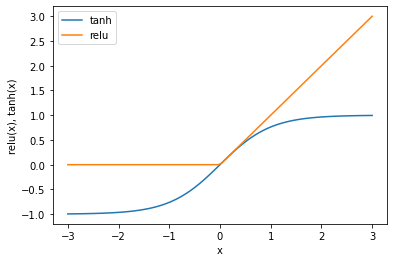

In [4]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

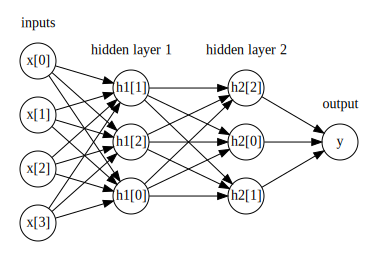

In [5]:
mglearn.plots.plot_two_hidden_layer_graph()

Text(0, 0.5, 'Feature 1')

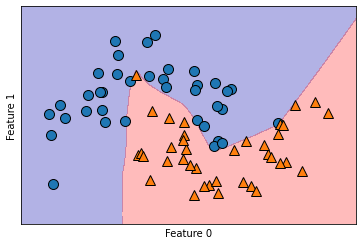

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

x, y = make_moons(n_samples=100, noise=0.25, random_state=3)

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(x_train, y_train)
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

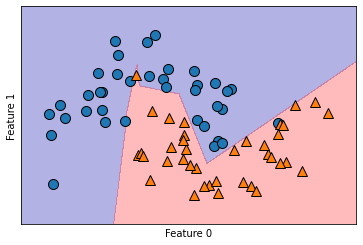

In [7]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(x_train, y_train)
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

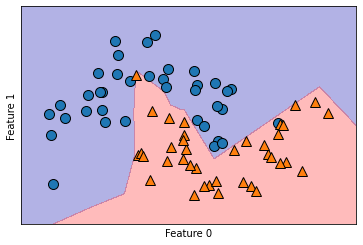

In [8]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0, 
                    hidden_layer_sizes=[10, 10])
mlp.fit(x_train, y_train)
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

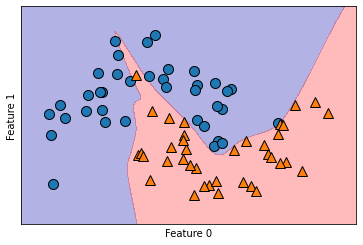

In [9]:
# using two hidden layers, with 10 units each, now with tanh monlinearity
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(x_train, y_train)
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


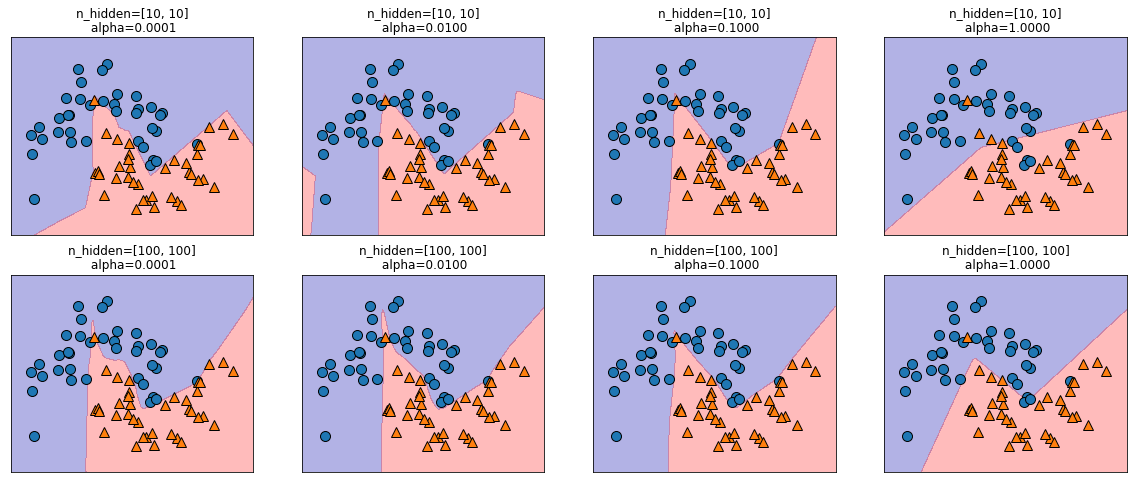

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(x_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\n alpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

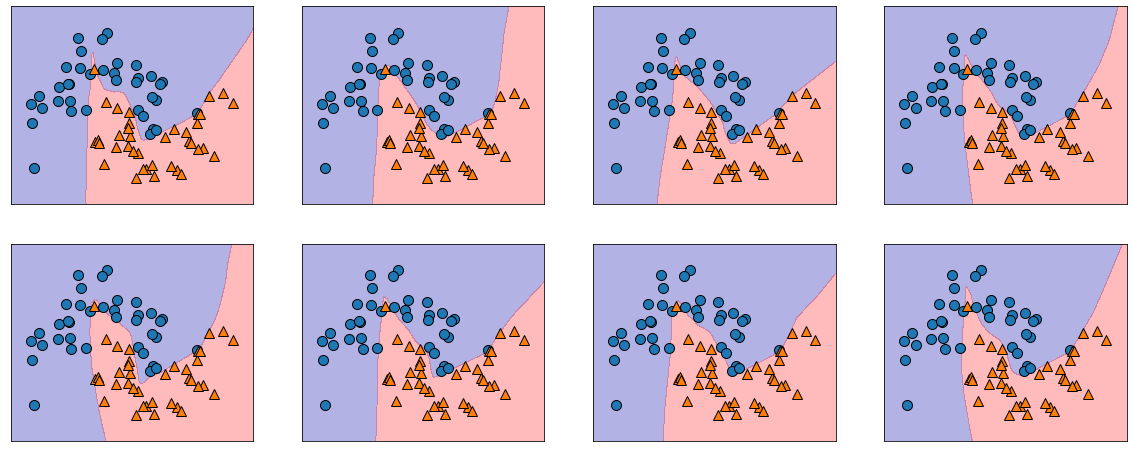

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(x_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train, ax=ax)

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [13]:
x_train, x_test, y_train, y_test = train_test_split(
     cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(x_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(x_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


In [14]:
# compute the mean value per feature on the training set
mean_on_train = x_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = x_train.std(axis=0)

# substract the mean, and scale by inverse standard deviation
# afterward, mean=0 and mean=1
x_train_scaled = (x_train - mean_on_train) / std_on_train
# use the same transformation (using training mean and std) on the test set
x_test_scaled = (x_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(x_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(x_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(x_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(x_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(x_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(x_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [16]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(x_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(x_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(x_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


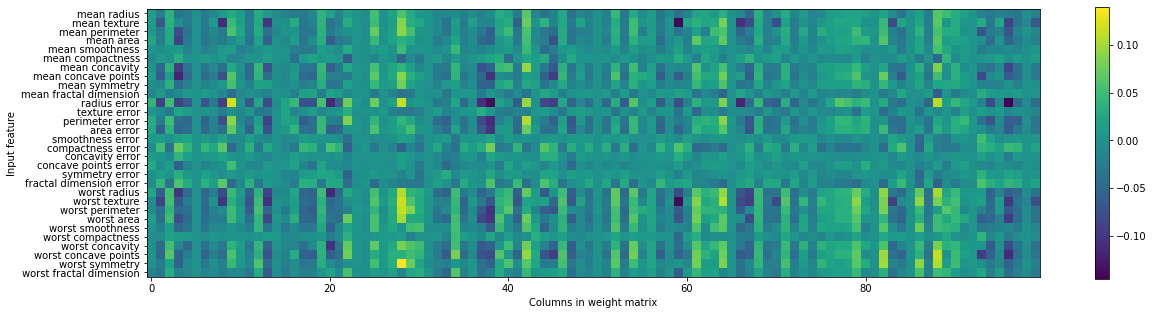

In [17]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
x, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# we rename the classes 'blue' and 'red' for illustration purposes
y_named = np.array(['blue', 'red'])[y]

# we can call train_test_split with arbitrarily many arrays,
# all will be split in a consistent manner
x_train, x_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(x, y_named, y, random_state=0)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train, y_train_named)

GradientBoostingClassifier(random_state=0)

In [19]:
print("x_test.shape: {}".format(x_test.shape))
print("Decision function shape: {}".format(gbrt.decision_function(x_test).shape))

x_test.shape: (25, 2)
Decision function shape: (25,)


In [20]:
# show the first few entries of decision_function
print("Decision function:\n {}".format(gbrt.decision_function(x_test)[:6]))

Decision function:
 [ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [21]:
print("Threshold decision function:\n {}".format(
    gbrt.decision_function(x_test) > 0))
print("Predictions:\n {}".format(gbrt.predict(x_test)))

Threshold decision function:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [22]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(x_test) > 0).astype(int)
# use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
print("pred is equal to predictions: {}".format(
    np.all(pred == gbrt.predict(x_test))))

pred is equal to predictions: True


In [23]:
decision_function = gbrt.decision_function(x_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
    np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29


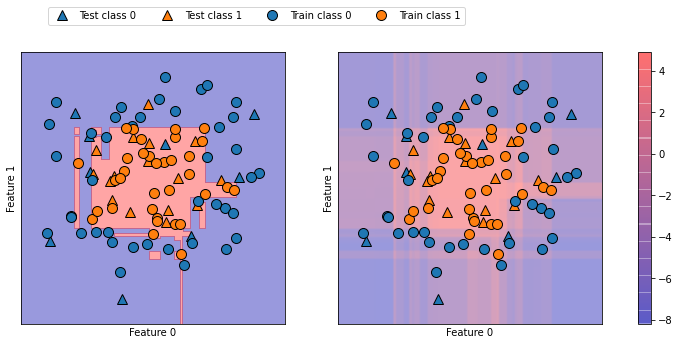

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, x, ax=axes[0], alpha=.4,
                               fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, x, ax=axes[1],
                                           alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(x_test[:, 0], x_test[:, 1], y_test,
                            markers='^', ax=ax)
    mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train,
                            markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
               "Train class 1"], ncol=4, loc=(.1, 1.1))

In [25]:
print("Shape of probability: {}".format(gbrt.predict_proba(x_test).shape))

Shape of probability: (25, 2)


In [26]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(
    gbrt.predict_proba(x_test[:6])))

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


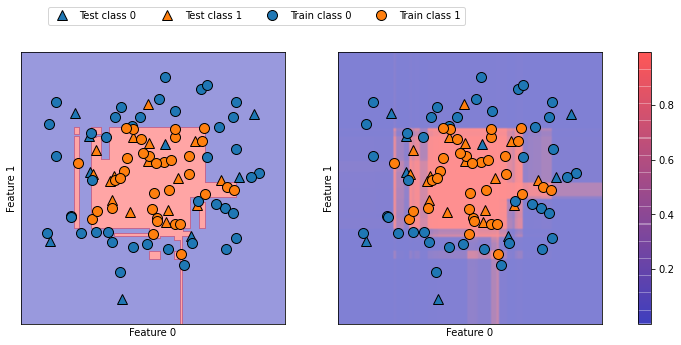

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, x, ax=axes[0], alpha=.4,
                               fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, x, ax=axes[1],
    alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(x_test[:, 0], x_test[:, 1], y_test,
                            markers='^', ax=ax)
    mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train,
                            markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
               "Train class 1"], ncol=4, loc=(.1, 1.1))

In [28]:
from sklearn.datasets import load_iris

iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [29]:
print("Decision function shape: {}".format(gbrt.decision_function(x_test).shape))
# plot the first few entries of the decision function
print("Decision function:\n{}".format(gbrt.decision_function(x_test)[:6, :]))

Decision function shape: (38, 3)
Decision function:
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


In [30]:
print("Argmax of decision function:\n{}".format(
    np.argmax(gbrt.decision_function(x_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(x_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [31]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(x_test)[:6]))
# show that sums across rows are one
print("Sums: {}".format(gbrt.predict_proba(x_test)[:6].sum(axis=1)))

Predicted probabilities:
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
Sums: [1. 1. 1. 1. 1. 1.]


In [32]:
print("Argmax of predicted probabilities:\n{}".format(
    np.argmax(gbrt.predict_proba(x_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(x_test)))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [33]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# represent each target by its class nam in the iris dataset
named_target = iris.target_names[y_train]
logreg.fit(x_train, named_target)
print("Unique classes in training data: {}".format(logreg.classes_))
print("Predictions: {}".format(logreg.predict(x_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(x_test), axis=1)
print("Argmax of decision function: {}".format(argmax_dec_func[:10]))
print("Argmax combined with classes: {}".format(
    logreg.classes_[argmax_dec_func][:10]))

Unique classes in training data: ['setosa' 'versicolor' 'virginica']
Predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
Argmax of decision function: [1 0 2 1 1 0 1 2 1 1]
Argmax combined with classes: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
